# Introduction 
We have $n=[0,1,2,3,···,N-1]$ as de discrete time index for $S[n]=S_n$:

$$ \theta = e^{\frac{2\pi i}{T_o}}$$


$$\delta[0]=\delta_0 =\frac{1}{T_o}$$

$$\delta[n] =\begin{cases} \delta_0\space for \space n=0\space mod\space T_{mod} \\
                     0\space for \space n > 0 \space mod\space T_{mod} \\
       \end{cases}$$

$$r[-1]=0$$


$$r[n] = r[n-1] + \delta[n] $$



$$\hat n[n] =r[n]·\theta^{n}$$


$M$ and $T_o$ are intended to be dynamic in final versions, but for simplification to start...

We could define $M$ as, to group-3-last-symbols: 

$$M=max(S[n],S[n-1],S[n-2])+1$$

Or in a more general situation:

$$M=max(S)+1$$

Consider $S_n$ to be a discretized sample at index n

So we can define our root of unity for representing all possible values of $S$ as:

$$\zeta = e^{\frac{2\pi i}{M}}$$

We could try as base periods for the data to be for example:

$$ T_o = 3 $$

or

$$ T_o = \frac{1}{2} (1+\sqrt{5}) $$


We need a reduction factor to bound the size of the plot at the center of the complex plane
$$K=\frac{1}{\sqrt{2}T_o^2}$$


In the center of the plot we represent the values over time as: 

$$Z[n]=K·log_2(n+2)·\zeta^{S_n}$$

$$\hat \gamma [n]=\gamma^n = \zeta^{S_n}$$ 


And

$$\hat \psi [n] =\psi^n = \hat n[n]+K·\zeta^{S_n}$$


# A simple(but incorrect) chained impedances model

This is a toy model that doesnt complete the job it was intended, but it's in the ball-park 

Lets consider $S_n$ to be a sampled symbol represented in a unit circle wheel with M slots for simplification:


Lets consider three consecutive events following an index $n=[0,1,2,3,....,N-1]$ and assign a name to each one :

$$S_0=S[n]$$
$$S_1=S[n-1]$$
$$S_2=S[n-2]$$

$$\zeta = e^{\frac{2\pi i}{M}}$$
$$ \theta = e^{\frac{2\pi i}{T_o}}$$

$$\delta[n] =\begin{cases} \delta_0\space for \space n=0\space mod\space T_{mod} \\
                     0\space for \space n > 0 \space mod\space T_{mod} \\
       \end{cases}$$

$$r[n] = r[n-1] + \delta[n] $$



$$\hat n[n] =r[n]·\theta^{n}$$


$$S_x=\zeta^{S_1}-\zeta^{S_0}$$
$$S_y=\zeta^{S_2}-\zeta^{S_1}$$
$$S_z=\zeta^{S_0}-\zeta^{S_2}$$


$$\chi^n=\frac{1}{S_z^2} e^{\frac{i \pi}{S_x-S_y}}$$

or as another example:

$$\hat \chi [n] = \chi^n=\frac{1}{S_z^2+2} e^{\frac{i \pi}{S_x-S_y+2}}$$


$$\zeta_{\alpha}=\frac{S_x S_y}{S_x+ S_y}$$
$$\zeta_{\beta}=\frac{ \zeta_{\alpha} S_z}{\zeta_{\alpha}+ S_z}$$
$$\zeta_{\gamma}=\frac{\zeta_{\alpha}\zeta_{\beta}}{\zeta_{\alpha}+\zeta_{\beta}}$$

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
primes_list_path='primes.csv'
bending_path='bending_df.csv'
bending_df=pd.read_csv(bending_path)
# import primes list as a numpy array
primes_list=pd.read_csv(primes_list_path)
#primes_list=np.array(primes_list.values,dtype=int)
batch_size =13*130

data = pd.read_csv('mod_37_cycle_data.csv')
basic_map = pd.read_csv('basic_map2.csv')
data.set_index('n', inplace=True)
basic_map.set_index('X', inplace=True)


df=primes_list

def isPrime(N):
    if df[df.eq(N).all(1)].values !=0:
        answer =   True 
    else:
        answer =   False
            
    return answer

In [3]:
# secret sauce
#p_n=floor(a*n+b*f_n+c*p₀)+S_n+T_n

In [4]:
df=bending_df[0:255]
a=np.array(df["a"].values)
b=np.array(df["b"].values)
c=np.array(df["c"].values)
index=np.array(df["n"].values)
fibo_n=np.array(df["f_n"].values)
S_n=np.array(df["S_n_cyclic"].values)
T_n=np.array(df["T_n_2_s"].values)
p_0=13
p_mod=np.array(df["p_mod_78"].values)
test_prime=np.array(df["test_prime"].values)
t_p=np.floor(a*index+b*fibo_n+c*p_0)+S_n+T_n
test_prime=t_p

In [5]:
df.set_index('n',inplace=True)

df.columns

Index(['n_mod_13', 'n_mod_64', 'S_n_cyclic', 'T_n_2_s', 'T_bits',
       'T_bits_2_T_n', 'n__6_bits', 'real_n', 'n_x', 'n_y', 'n_z', 'f_n',
       'real_f_n', 'p_n', 'real_p_n', 'log(p_n)', 'a', 'b', 'c', 'test_prime',
       'p_mod_78', 'state', 'p_n.1'],
      dtype='object')

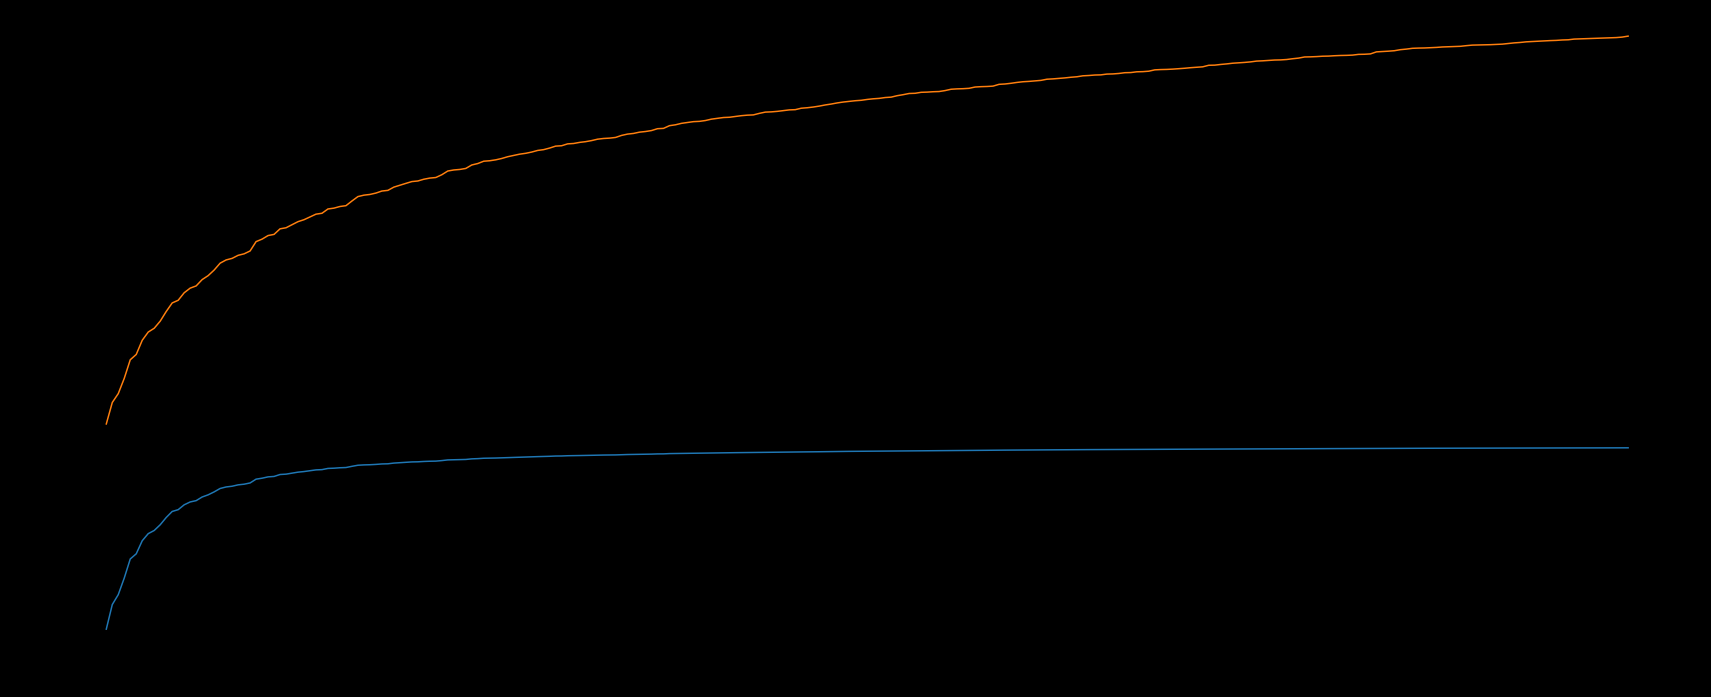

In [41]:
plt.figure(figsize=(30,12))
df['real_p_n'].plot()
df['log(p_n)'].plot()

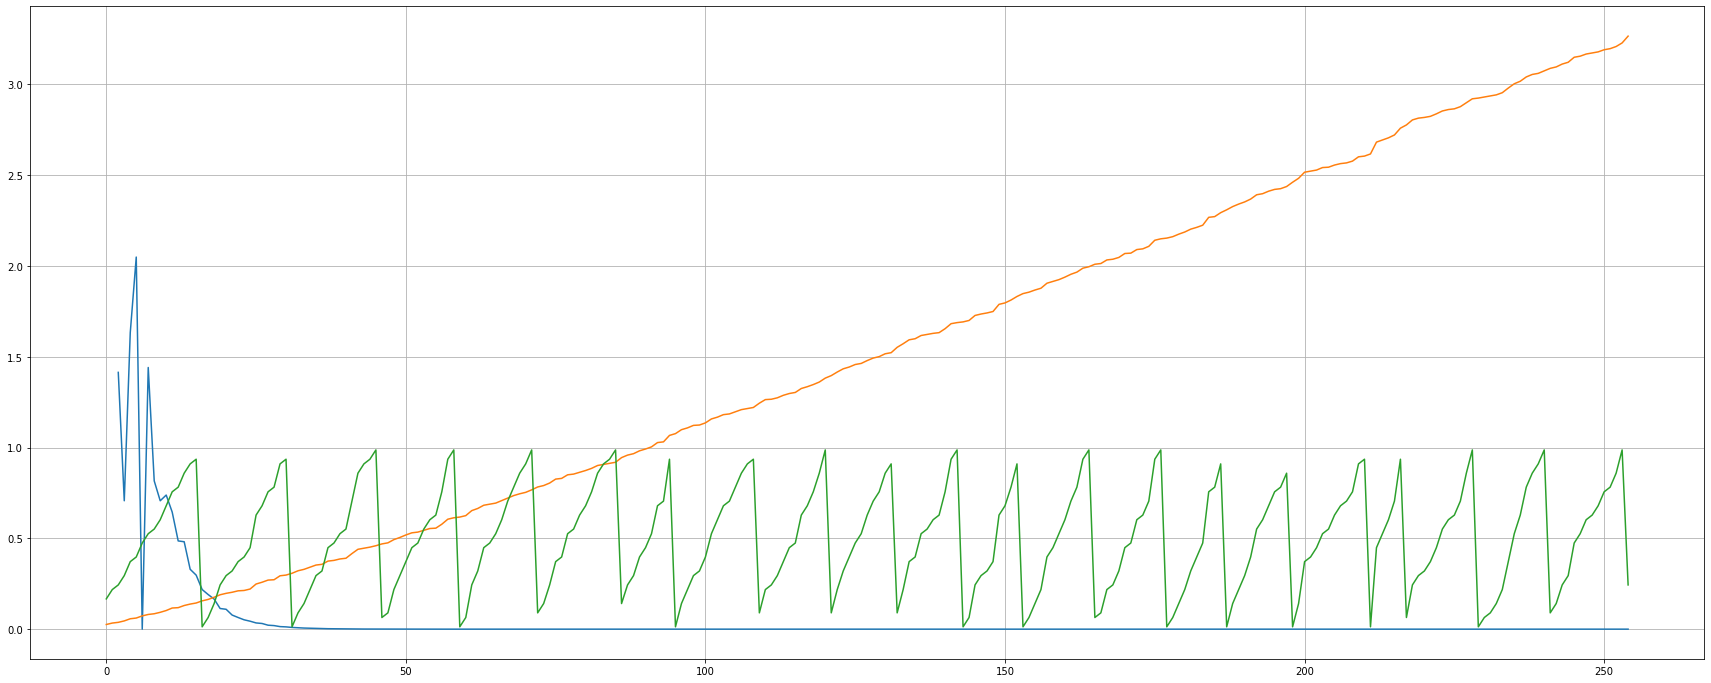

In [6]:
plt.figure(figsize=(30,12))
plt.plot(index,b**(1/2))
#plt.plot(index,a)
#plt.plot(index,c)
plt.plot(index,test_prime*(1/(13*39)))
plt.plot(index,p_mod*(1/(13*6)))
plt.grid()


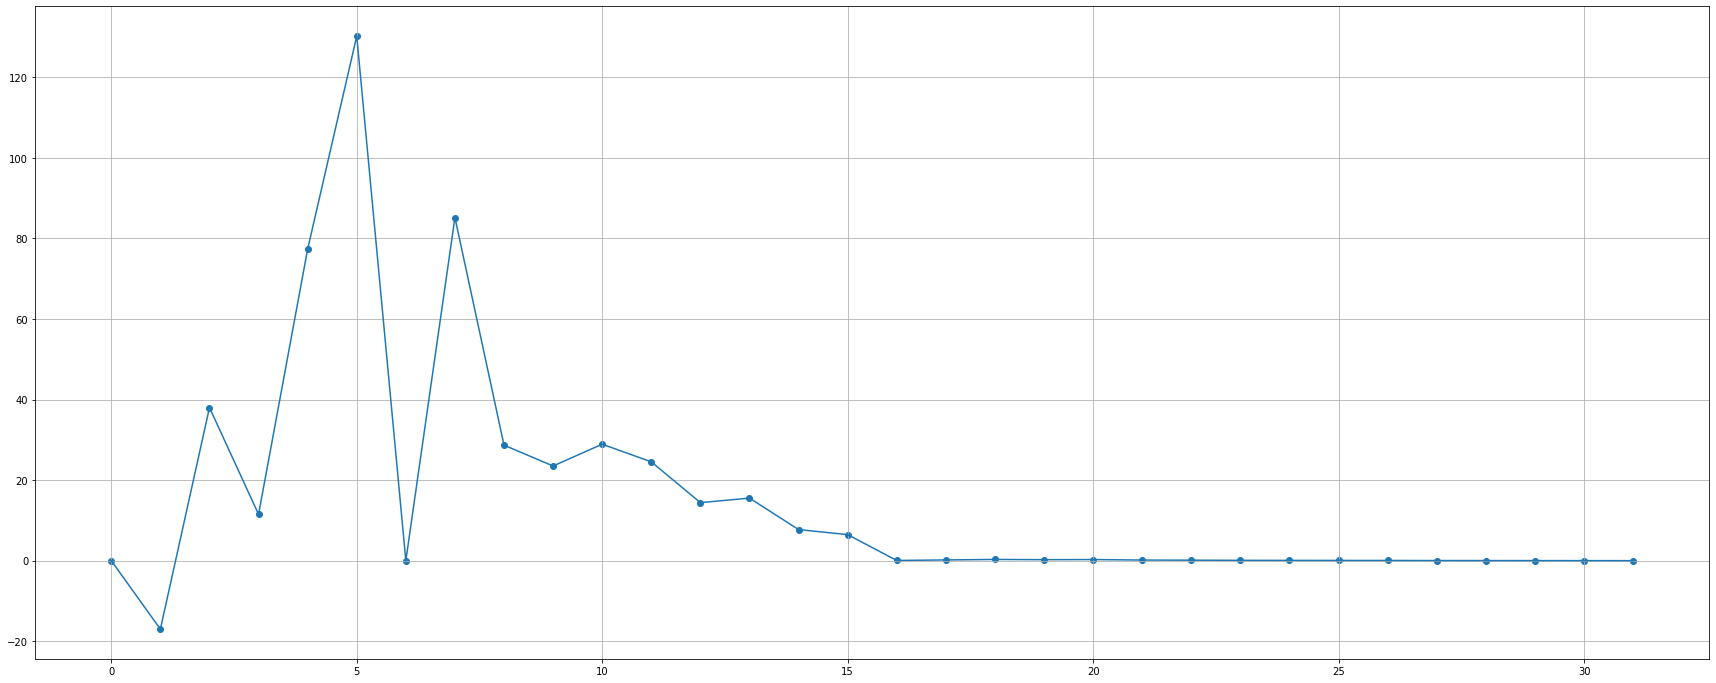

In [7]:
plt.figure(figsize=(30,12))
#plt.plot(index,b**(1/13))
#plt.plot(index,a)
#plt.plot(index,c)
#plt.plot(index,test_prime*(1/(13*39)))
#plt.plot(index,p_mod*(1/(13*6)))
ddd=b*p_mod
aa=0
bb=aa+32
plt.scatter(index[aa:bb],ddd[aa:bb])
plt.plot(index[aa:bb],ddd[aa:bb])
plt.grid(True)


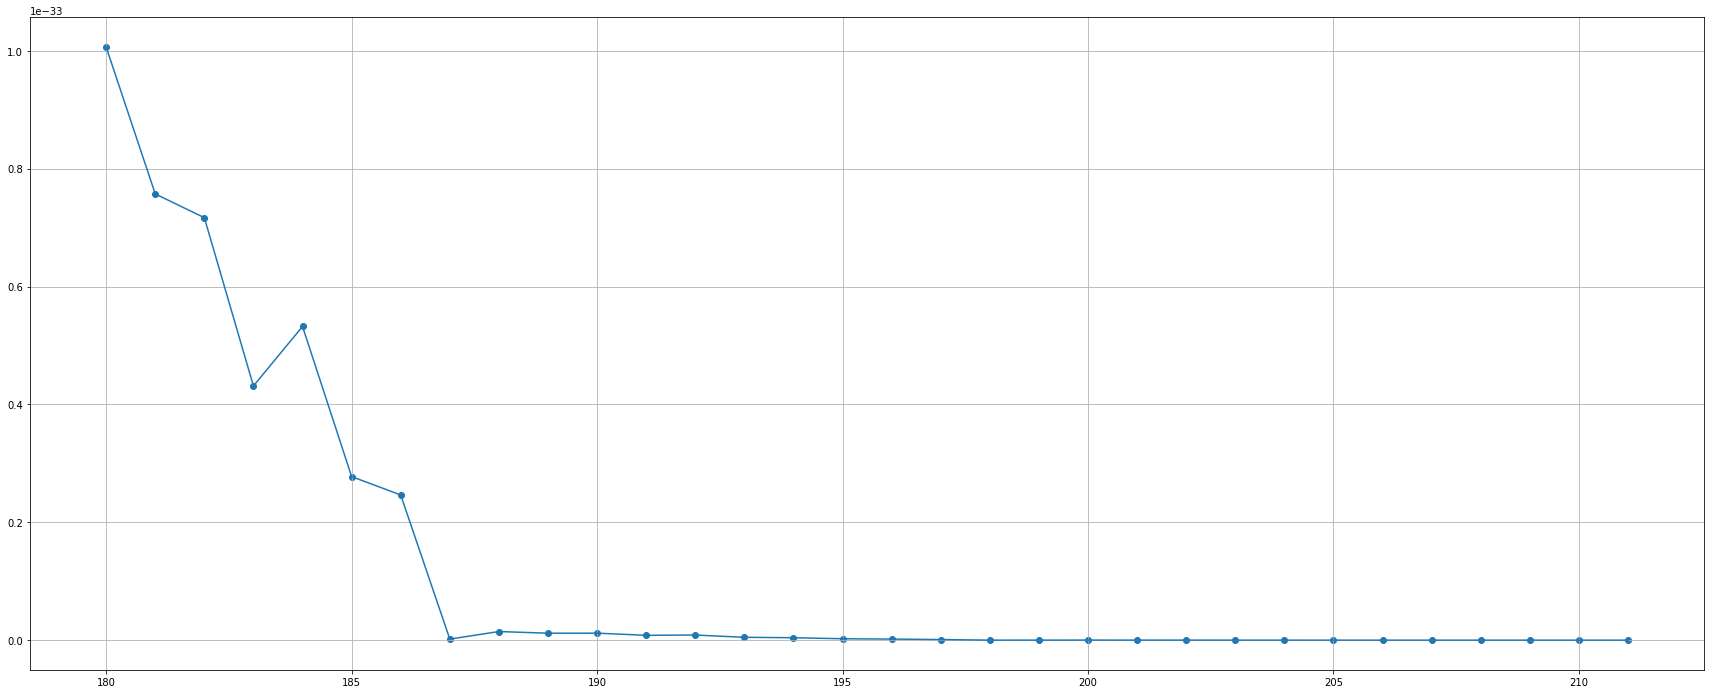

In [8]:
plt.figure(figsize=(30,12))
#plt.plot(index,b**(1/13))
#plt.plot(index,a)
#plt.plot(index,c)
#plt.plot(index,test_prime*(1/(13*39)))
#plt.plot(index,p_mod*(1/(13*6)))
ddd=b*p_mod
aa=180
bb=aa+32
plt.scatter(index[aa:bb],ddd[aa:bb])
plt.plot(index[aa:bb],ddd[aa:bb])
plt.grid(True)


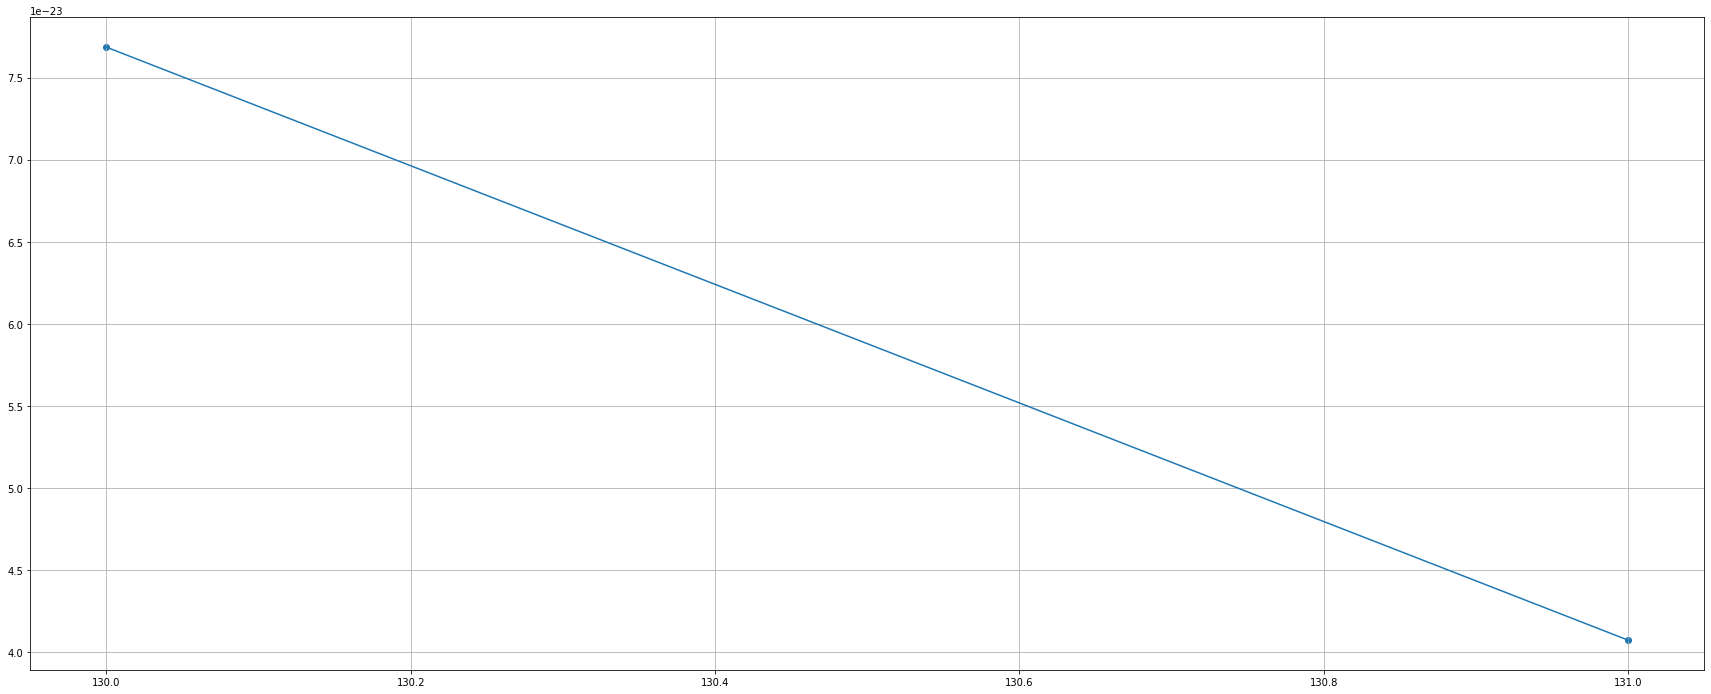

In [9]:
plt.figure(figsize=(30,12))
aa=130
bb=aa+2
plt.scatter(index[aa:bb],ddd[aa:bb])
plt.plot(index[aa:bb],ddd[aa:bb])
plt.grid(True)


####  to be float or to be fixed, that is one point 
v = 50.15
d = Decimal(v).quantize(Decimal('1.00'))
 Using round (Does not work in python2)
d = round(Decimal(v), 2) 

https://stackoverflow.com/questions/45136821/how-to-convert-float-to-fixed-point-decimal-in-python

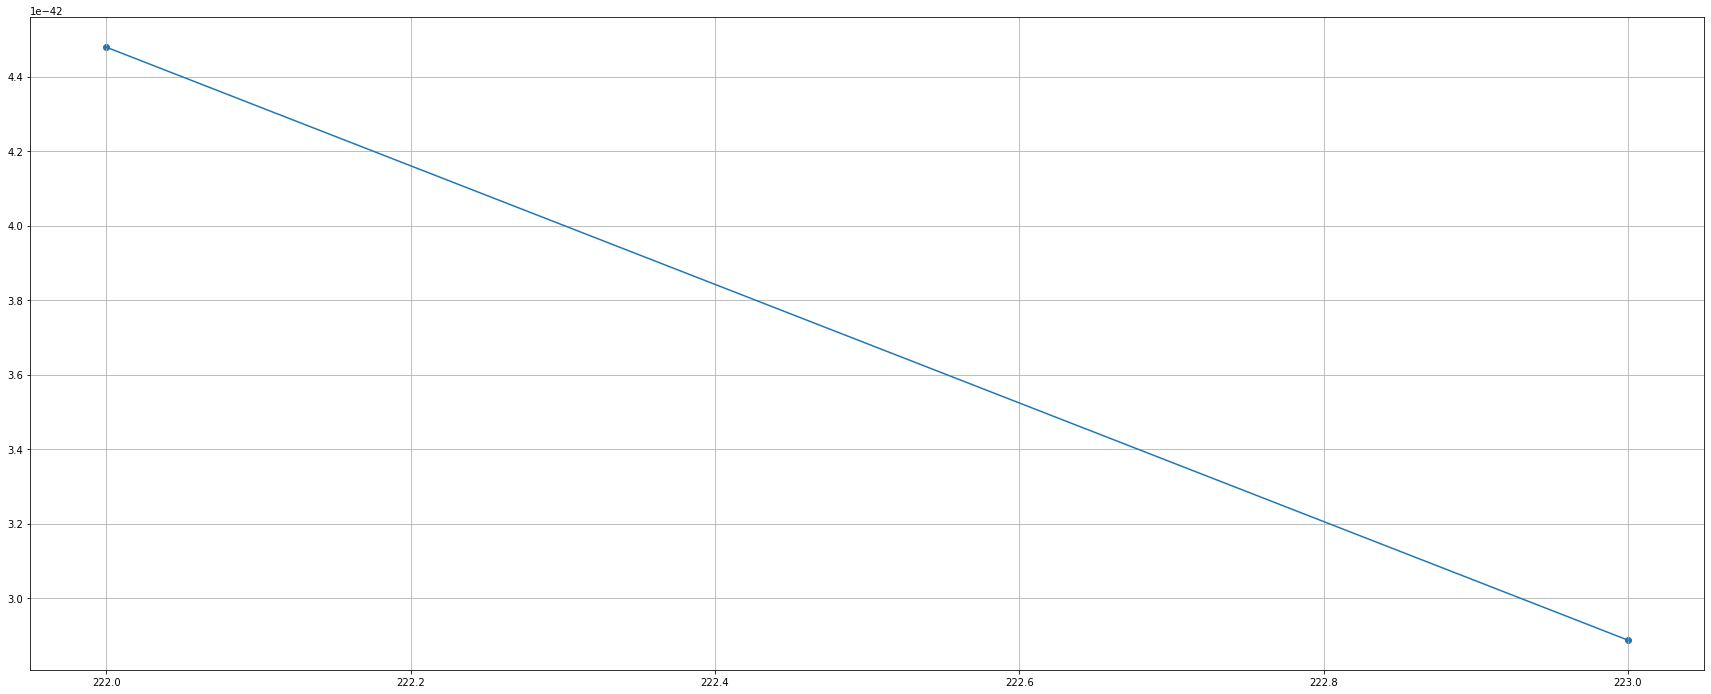

In [10]:
plt.figure(figsize=(30,12))
aa=222
bb=aa+2
plt.scatter(index[aa:bb],ddd[aa:bb])
plt.plot(index[aa:bb],ddd[aa:bb])
plt.grid(True)








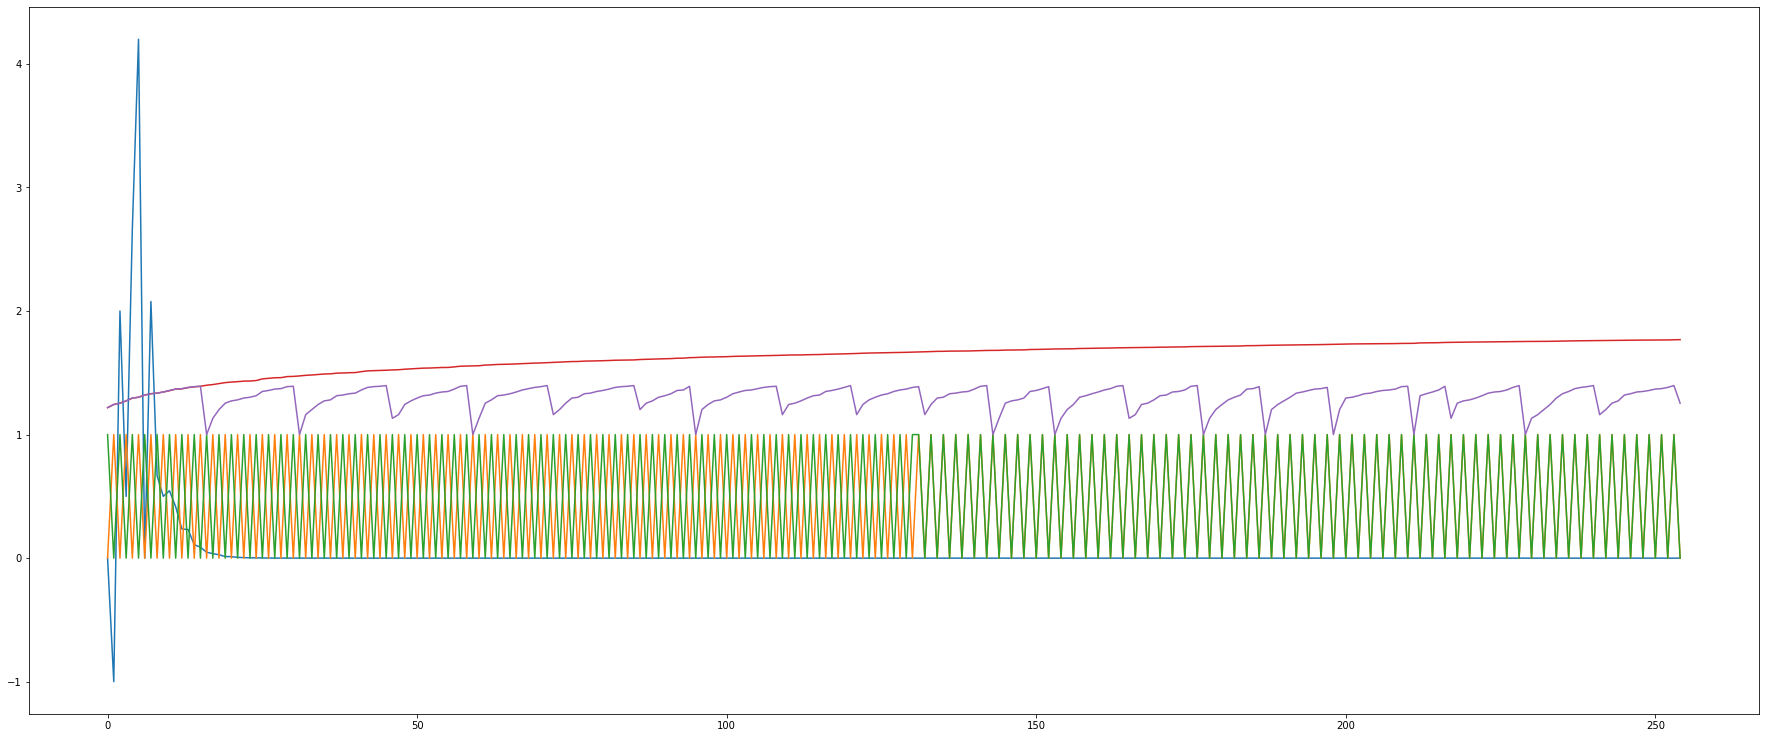

In [11]:
plt.figure(figsize=(31,13))
plt.plot(index,b)
plt.plot(index,a)
plt.plot(index,c)
plt.plot(index,test_prime**(1/13))
plt.plot(index,p_mod**(1/13))

In [12]:
#S = np.array(data.S[0:batch_size].values)
index = np.arange(0,batch_size)

In [13]:
def black_bg(SIZE):
    plt.figure(figsize=(SIZE,SIZE))
    plt.rcParams.update({
            "lines.color": "black",
            "patch.edgecolor": "black",
            "text.color": "black",
            "axes.facecolor": "black",
            "axes.edgecolor": "black",
            "axes.labelcolor": "black",
            "xtick.color": "black",
            "ytick.color": "black",
            "grid.color": "black",
            "figure.facecolor": "black",
            "figure.edgecolor": "black",
            "savefig.facecolor": "black",
            "savefig.edgecolor": "black"})

In [14]:
#S = np.array(data.S[0:batch_size].values)
index = np.arange(0,batch_size)

In [15]:
import random

In [16]:
def get_impedance_wheels(S,M,batch_size,T_o,T_mod,T_color,SIZE,K,rand,title,ani,scat,text_1,text_2,font,scat_dot,lines):
    black_bg(20)
    index = np.arange(0,batch_size)
    n_mod = index%T_mod
    r_time_v   =np.zeros(batch_size,dtype=float)
    symbol   =np.zeros(batch_size,dtype=float)
    zeta_v     =np.zeros(batch_size,dtype=complex)
    cplx_index =np.zeros(batch_size,dtype=complex)
    
    X_color = cm.get_cmap('hsv', T_color)
    
    zeta       =np.exp(1j*2*np.pi/(np.max(S)+1))
    delta      = 1/T_o
    w_o        = 2*np.pi/T_o
    tau = np.exp(1j*w_o)
    

    for n in index:
        symbol[n]=n_mod[n]
        #symbol[n]=S[n]
        if rand==1:
            symbol[n]     = random.randint(1, M) # symbols from RNG

        if n_mod[n]==0:
            r_time_v[n]=r_time_v[n-1]+delta
        else:
            r_time_v[n]=r_time_v[n-1]
        cplx_index[n]=r_time_v[n]*tau**n
        if scat:
            plt.scatter(cplx_index[n].real,cplx_index[n].imag,color=X_color(n%T_color),s=scat_dot)
        if text_1:
            plt.text(cplx_index[n].real-K,cplx_index[n].imag,str(n%T_color),color=X_color(n%T_color),fontsize=font)
            #plt.text(cplx_index[n].real-K,cplx_index[n].imag,str(n%T_color),color=X_color(symbol[n]%T_color),fontsize=font)
        if text_2:
            plt.text(cplx_index[n].real+K,cplx_index[n].imag,str(n),color='gray',fontsize=font-4)
        if ani:
            plt.savefig(title+str(n)+'.png')
    if lines:
        plt.plot(cplx_index.real,cplx_index.imag,color='gray',alpha=0.09)
        



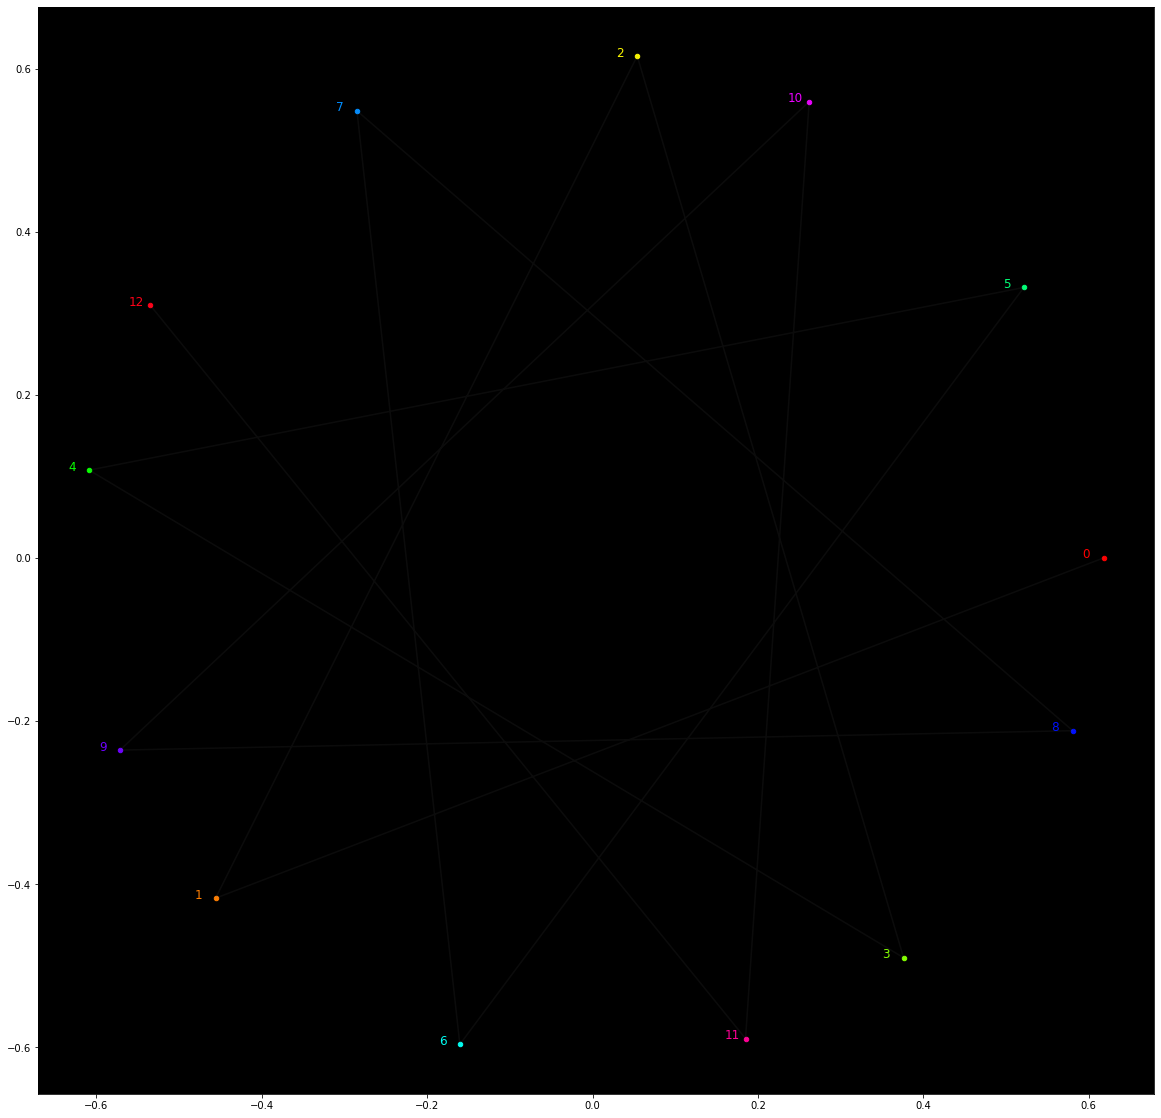

In [17]:
batch_size=13
S=np.arange(0,batch_size)
M=13
T_o =0.5*(1+np.sqrt(5))
T_mod = 13
T_color =13
SIZE =20
K=1/39
rand=0
title='test'
ani=0
scat=1
text_1=1
text_2=0
font=12
scat_dot=20
lines=1
get_impedance_wheels(S,M,batch_size,T_o,T_mod,T_color,SIZE,K,rand,title,ani,scat,text_1,text_2,font,scat_dot,lines)

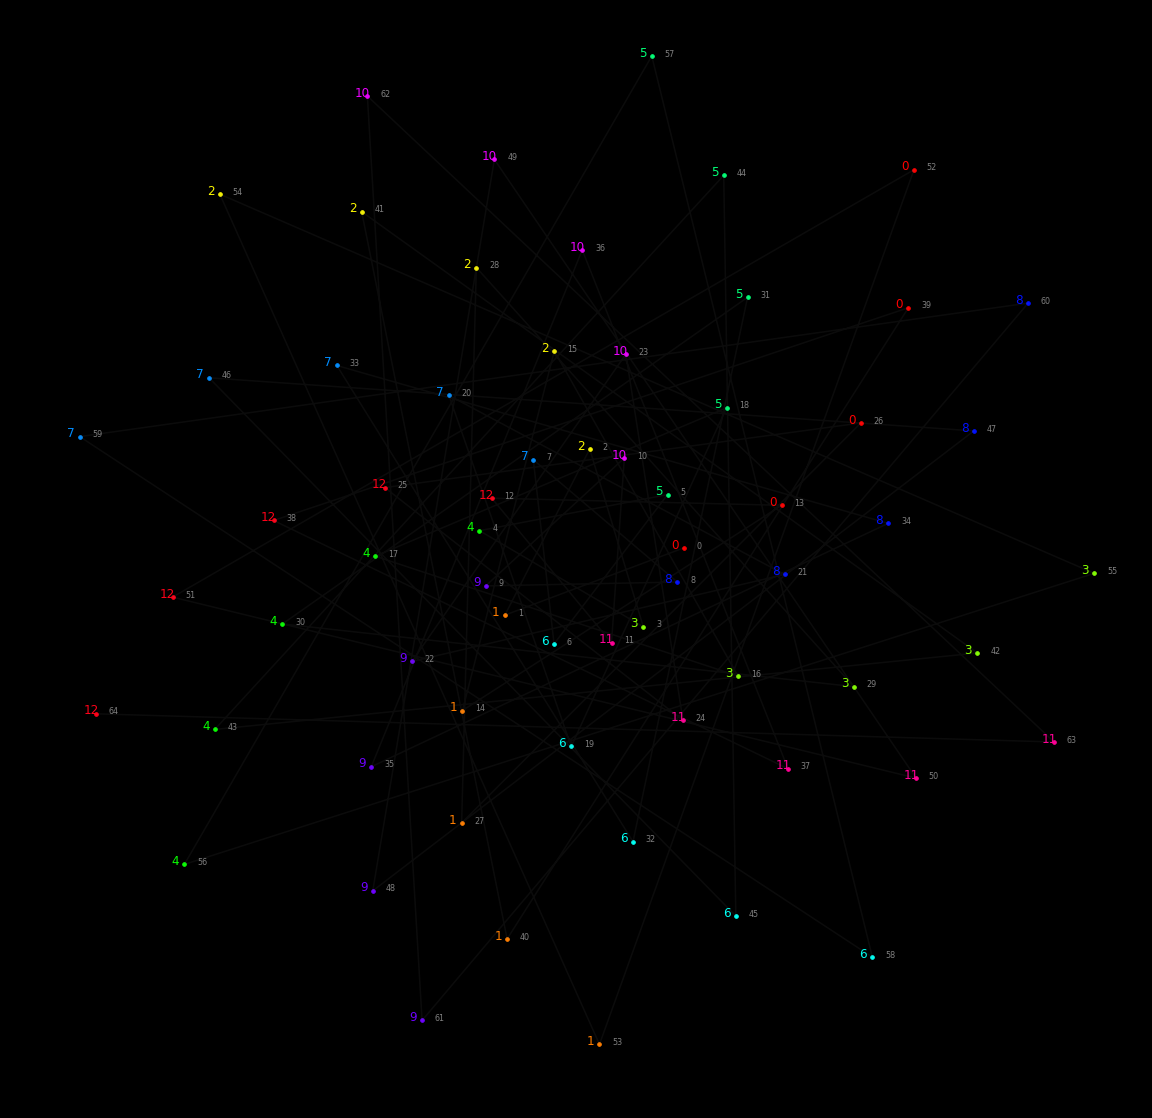

In [18]:
batch_size=13*5
S=np.arange(0,batch_size)
M=13
T_o =0.5*(1+np.sqrt(5))
T_mod = 13
T_color =13
SIZE =20
K=1/13
rand=0
title='test'
ani=0
scat=1
text_1=1
text_2=1
font=12
scat_dot=13
lines=1
get_impedance_wheels(S,M,batch_size,T_o,T_mod,T_color,SIZE,K,rand,title,ani,scat,text_1,text_2,font,scat_dot,lines)

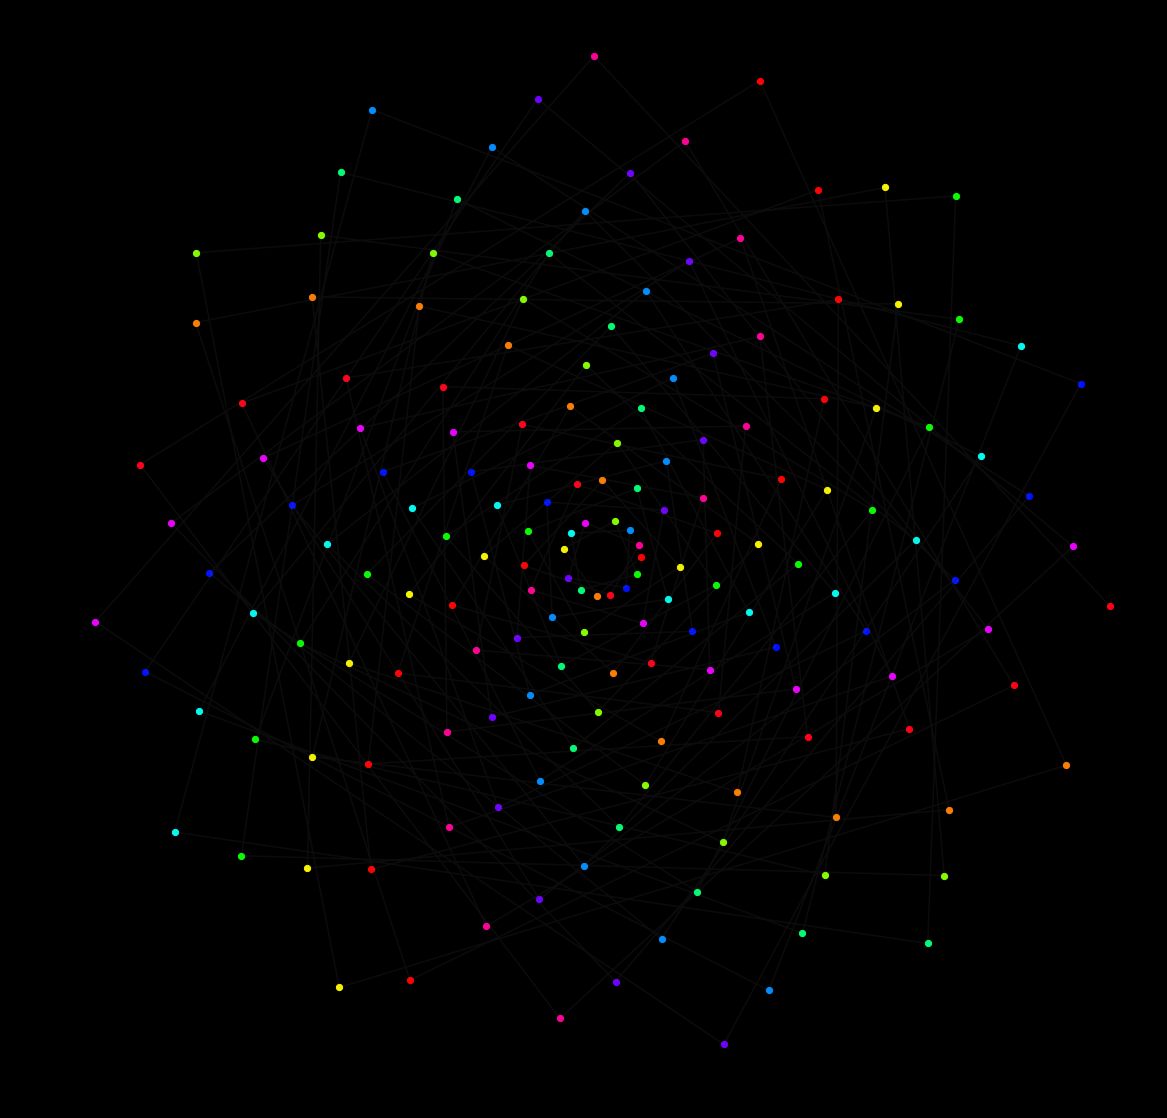

In [19]:
batch_size=13*13
S=np.arange(0,batch_size)
M=13
T_o =0.5*(1+np.sqrt(3))
T_mod = 13
T_color =13
SIZE =20
K=1/13
rand=0
title='test'
ani=0
scat=1
text_1=0
text_2=0
font=12
scat_dot=39
lines=1
get_impedance_wheels(S,M,batch_size,T_o,T_mod,T_color,SIZE,K,rand,title,ani,scat,text_1,text_2,font,scat_dot,lines)

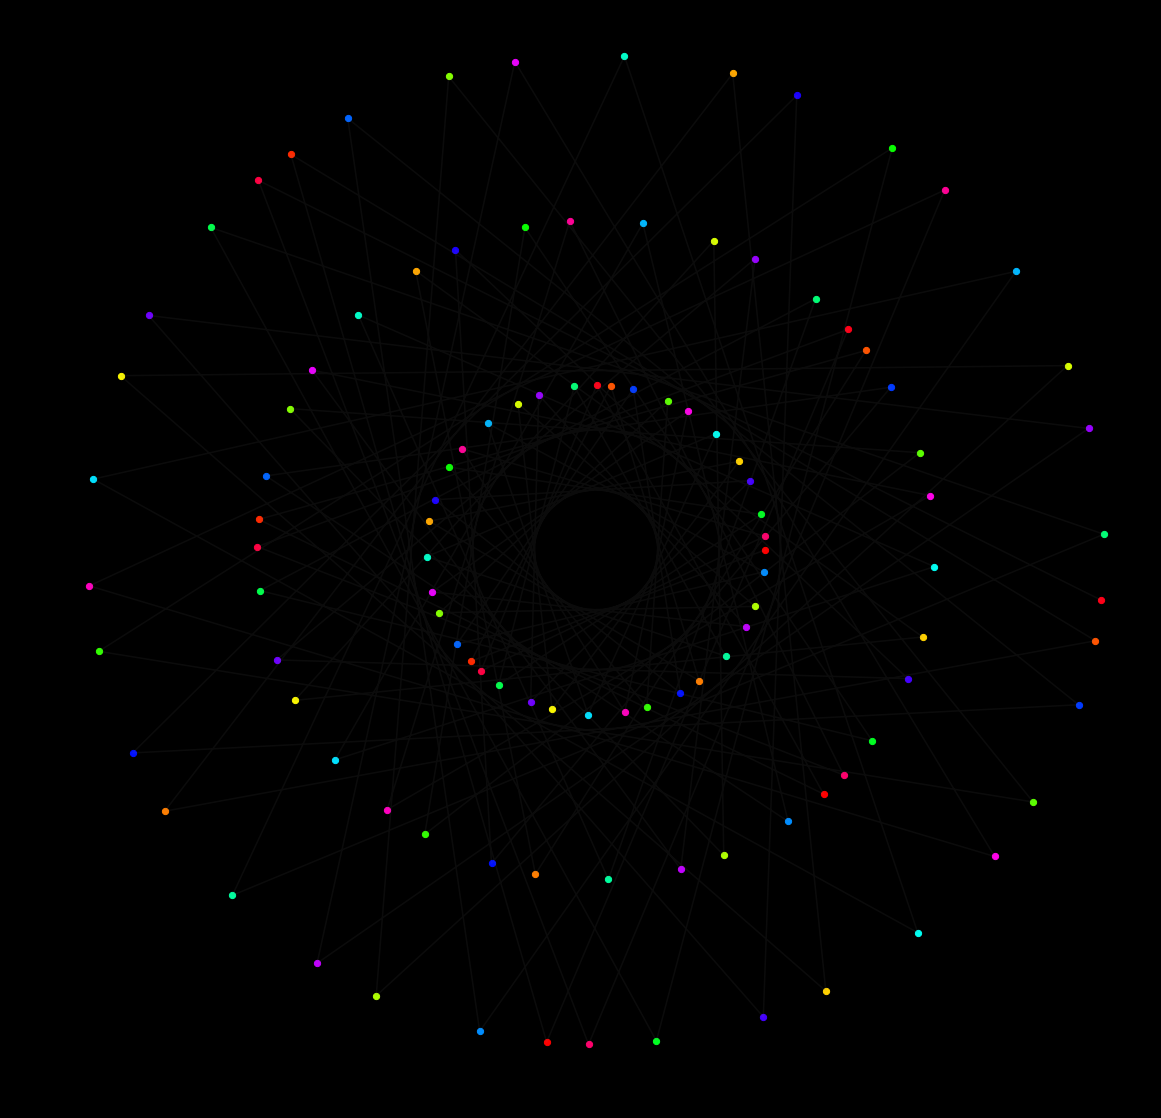

In [20]:
batch_size=37*3
S=np.arange(0,batch_size)
M=13
T_o =0.5*(1+np.sqrt(5))
T_mod = 37
T_color =37
SIZE =20
K=1/80
rand=0
title='test'
ani=0
scat=1
text_1=0
text_2=0
font=12
scat_dot=39
lines=1
get_impedance_wheels(S,M,batch_size,T_o,T_mod,T_color,SIZE,K,rand,title,ani,scat,text_1,text_2,font,scat_dot,lines)

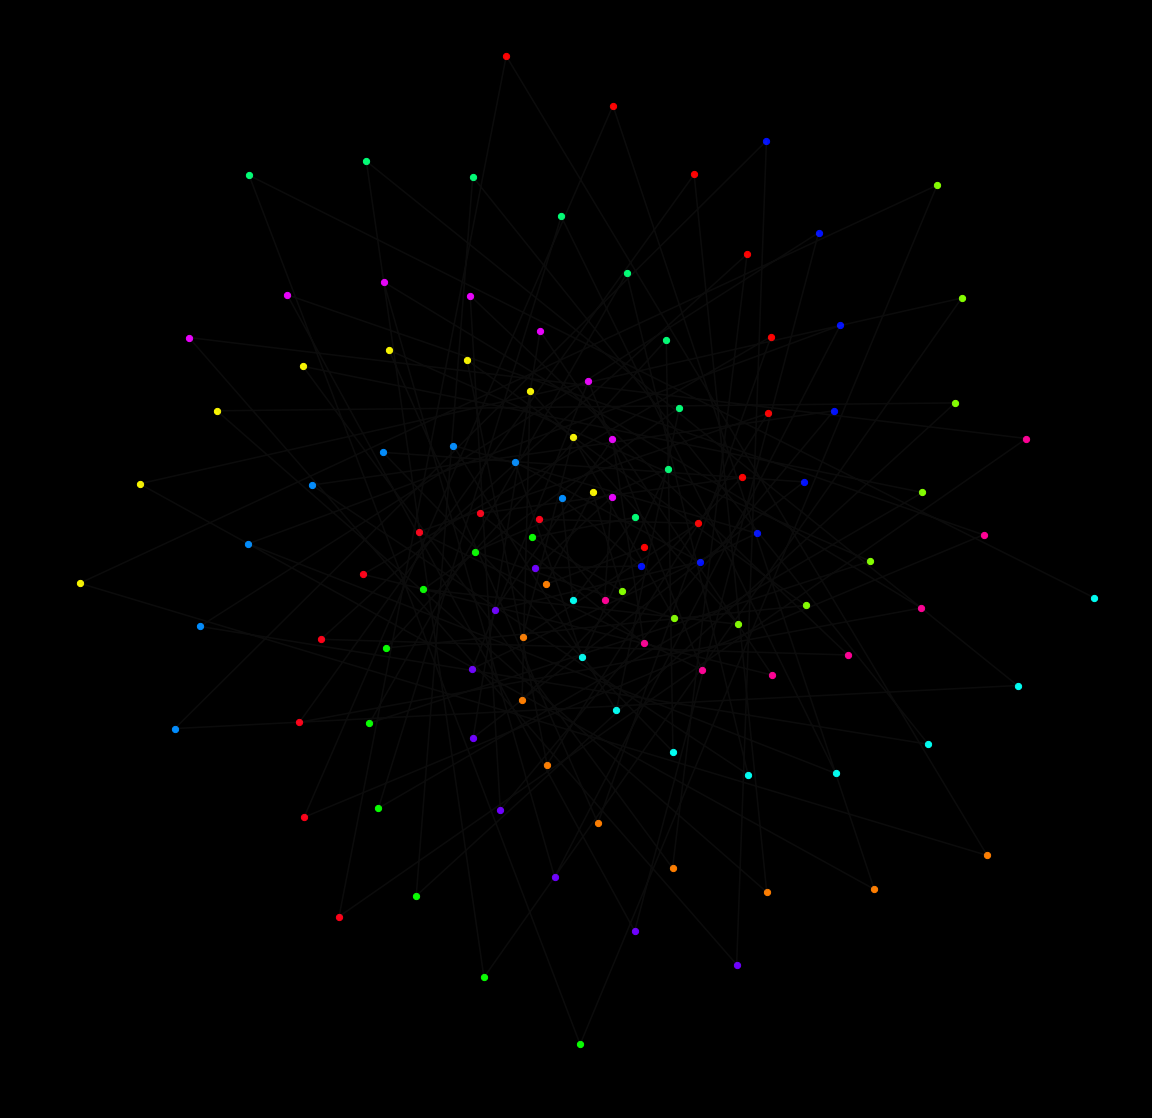

In [21]:
batch_size=37*3
S=np.arange(0,batch_size)
M=13
T_o =0.5*(1+np.sqrt(5))
T_mod = 13
T_color =13
SIZE =20
K=1/80
rand=0
title='test'
ani=0
scat=1
text_1=0
text_2=0
font=12
scat_dot=39
lines=1
get_impedance_wheels(S,M,batch_size,T_o,T_mod,T_color,SIZE,K,rand,title,ani,scat,text_1,text_2,font,scat_dot,lines)

## With impedances added

In [22]:
def get_impedance_wheelsv2(S,M,batch_size,T_o,T_mod,T_color,SIZE,K,kk,rand,title,ani,scat,text_1,text_2,font,scat_dot,lines,imp,final_plot):
    black_bg(20)
    index = np.arange(0,batch_size)
    n_mod = index%T_mod
    r_time_v   =np.zeros(batch_size,dtype=float)
    symbol   =np.zeros(batch_size,dtype=float)
    zeta_v     =np.zeros(batch_size,dtype=complex)
    zeta_0     =np.zeros(batch_size,dtype=complex)
    zeta_1     =np.zeros(batch_size,dtype=complex)
    zeta_2     =np.zeros(batch_size,dtype=complex)
    S_x     =np.zeros(batch_size,dtype=complex)
    S_y     =np.zeros(batch_size,dtype=complex)
    S_z     =np.zeros(batch_size,dtype=complex)
    zeta_alpha=np.zeros(batch_size,dtype=complex)
    zeta_beta=np.zeros(batch_size,dtype=complex)
    zeta_gamma=np.zeros(batch_size,dtype=complex)
    chi=np.zeros(batch_size,dtype=complex)

    cplx_index =np.zeros(batch_size,dtype=complex)
    
    X_color = cm.get_cmap('hsv', T_color)
    
    zeta       =np.exp(1j*2*np.pi/(np.max(S)+1))
    delta      = 1/T_o
    w_o        = 2*np.pi/T_o
    tau = np.exp(1j*w_o)
    
    
    for n in index:
        symbol[n]=n_mod[n]
        #symbol[n]=S[n]
        if rand==1:
            symbol[n]     = random.randint(0, M-1) # symbols from RNG

        if n_mod[n]==0:
            r_time_v[n]=r_time_v[n-1]+delta
        else:
            r_time_v[n]=r_time_v[n-1]
        cplx_index[n]=r_time_v[n]*tau**n
        if scat:
            plt.scatter(cplx_index[n].real,cplx_index[n].imag,color=X_color(n%T_color),s=scat_dot)
        if text_1:
            plt.text(cplx_index[n].real-K,cplx_index[n].imag,str(n%T_color),color=X_color(n%T_color),fontsize=font)
            #plt.text(cplx_index[n].real-K,cplx_index[n].imag,str(n%T_color),color=X_color(symbol[n]%T_color),fontsize=font)
        if text_2:
            plt.text(cplx_index[n].real+K,cplx_index[n].imag,str(n),color='gray',fontsize=font-4)
        if imp and n>2:
            
            zeta_0[n]=zeta**symbol[n]
            zeta_1[n]=zeta**symbol[n-1]
            zeta_2[n]=zeta**symbol[n-2]
            S_x[n]=zeta_1[n]-zeta_0[n]
            S_y[n]=zeta_2[n]-zeta_1[n]
            S_z[n]=zeta_0[n]-zeta_2[n]
            zeta_alpha[n]=S_x[n]*S_y[n]/(S_x[n]+S_y[n])
            zeta_beta[n]=zeta_alpha[n]*S_z[n]/(zeta_alpha[n]+S_z[n])
            zeta_gamma[n]=zeta_alpha[n]*zeta_beta[n]/(zeta_alpha[n]+zeta_beta[n])
            chi[n] =(1/(S_z[n]**2-1))*np.exp(1j*np.pi/(S_x[n]-S_y[n]+1))
            plt.scatter(kk*chi.real[n],kk*chi.imag[n],color=X_color(n%T_color),s=scat_dot/3)

        if ani:
            plt.savefig(title+str(n)+'.png')
    if lines:
        plt.plot(cplx_index.real,cplx_index.imag,color='gray',alpha=0.09)
    if final_plot:
        plt.savefig(title+'.png')
     
        

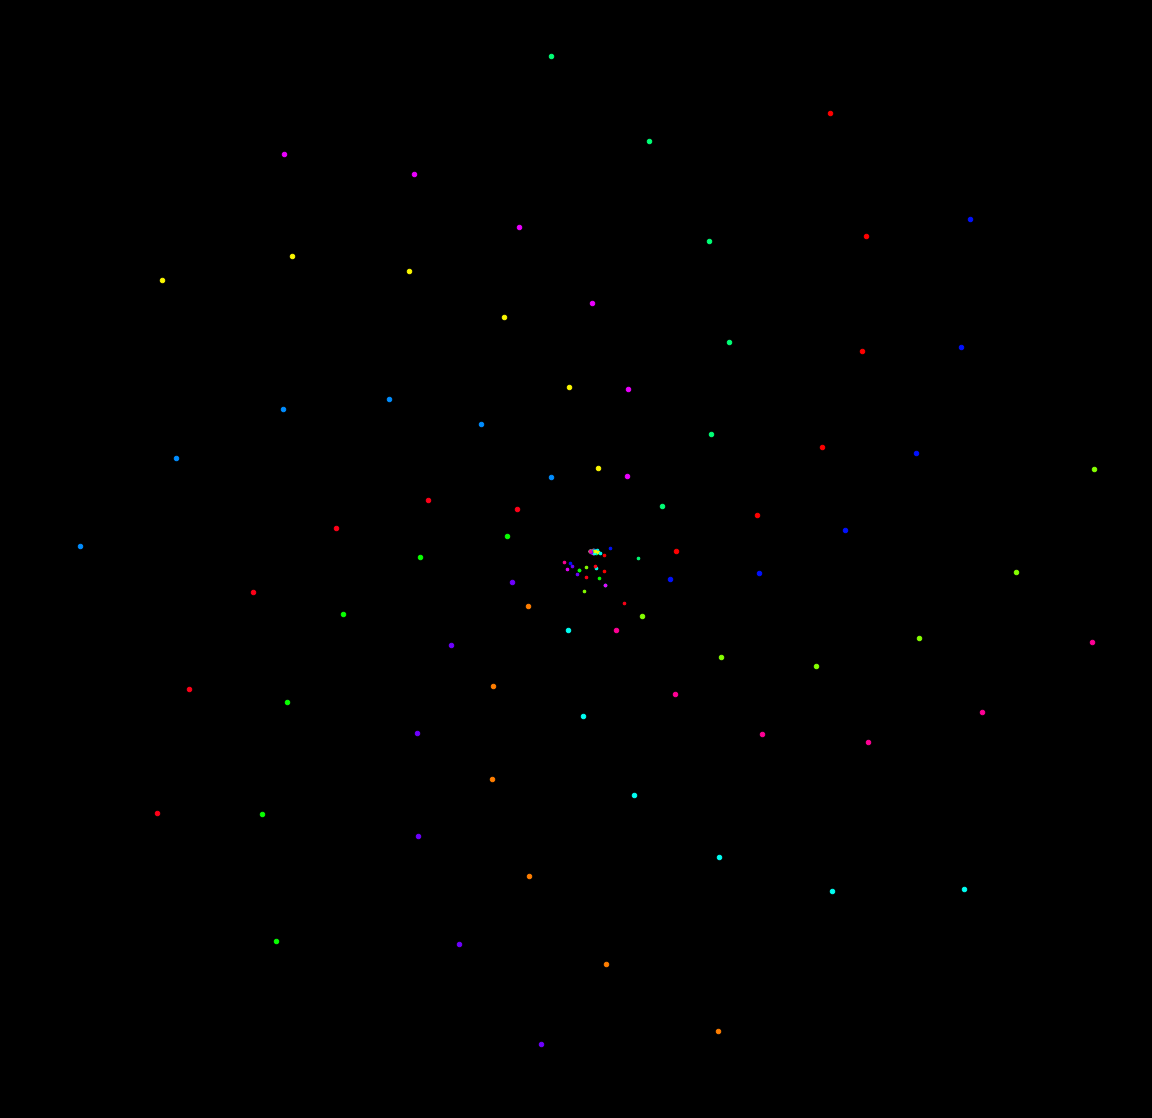

In [23]:
batch_size=13*6
S=np.arange(0,batch_size)
M=13
T_o =0.5*(1+np.sqrt(5))
T_mod = 13
T_color =13
SIZE =20
K=1/39
rand=1
title='test'
ani=0
scat=1
text_1=0
text_2=0
font=12
scat_dot=20
lines=0
imp=1
final_plot=1
kk=2**(-6)
get_impedance_wheelsv2(S,M,batch_size,T_o,T_mod,T_color,SIZE,K,kk,rand,title,ani,scat,text_1,text_2,font,scat_dot,lines,imp,final_plot)

In [24]:
import sympy
sympy.init_printing()
import warnings
warnings.filterwarnings("ignore")
from sympy.abc import alpha, beta, zeta  ,gamma


In [25]:
n = sympy.Symbol('n')

S_x = sympy.Symbol('S_x')  #S[n]
S_y = sympy.Symbol('S_y')  #S[n-1]
S_z = sympy.Symbol('S_z')  #S[n-2]

S_n = sympy.Symbol('S_n')
S_n1 = sympy.Symbol('S_{n-1}')
S_n2 = sympy.Symbol('S_{n-2}')

zeta = sympy.Symbol('zeta')

In [26]:
Z_x=zeta**S_x
Z_y=zeta**S_y
Z_z=zeta**S_z 

Z_alpha =Z_x*Z_y/(Z_x+Z_y)


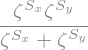

In [27]:
Z_alpha

In [28]:
Z_beta = Z_alpha*Z_z/(Z_alpha+Z_z)

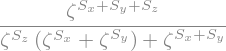

In [29]:
sympy.simplify(Z_beta)

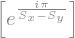

In [30]:
f_z=sympy.Eq(Z_beta)
sympy.solve(f_z,zeta)

In [31]:
S_0 = sympy.Symbol('S_0')  #S[n]
S_1 = sympy.Symbol('S_1')  #S[n-1]
S_2 = sympy.Symbol('S_2')  #S[n-2]

In [32]:
zeta_0 = sympy.Symbol('zeta_0')
zeta_1 = sympy.Symbol('zeta_1')
zeta_2 = sympy.Symbol('zeta_2')

In [33]:
zeta_alpha =sympy.Symbol('zeta_alpha')
zeta_beta =sympy.Symbol('zeta_beta')

In [34]:
zeta_alpha+1j*zeta_beta

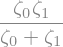

In [35]:
zeta_alpha = zeta_0*zeta_1/(zeta_0+zeta_1)
zeta_alpha 

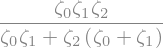

In [36]:
zeta_beta= zeta_alpha*zeta_2/(zeta_alpha+zeta_2)
sympy.simplify(zeta_beta)

In [37]:
f_z=sympy.Eq(zeta_2,sympy.pi)
sympy.solve(f_z,zeta)

In [38]:
# z = sympy.Symbol('z')
# T_o = sympy.Symbol('T_o')
# zeta = sympy.exp(1j*2*sympy.pi/T_o)
# f_z=sympy.Eq((z-zeta**0)*(z-zeta**1)*(z-zeta**2)*(z-zeta**3)*(z-zeta**4)*(z-zeta**5))
# sympy.solve(f_z,z)
# expreso = (z-zeta**0)*(z-zeta**1)*(z-zeta**2)*(z-zeta**3)*(z-zeta**4)*(z-zeta**5)
# zz=sympy.expand(expreso)
# zzz = sympy.collect(zz,z)
# sympy.simplify(zzzsss)
# zzz.evalf(subs={T_o:6})
# from sympy.abc import alpha, beta, zeta 
# zeta = sympy.Symbol('zeta',complex=True)